Plots

/var/folders/3r/96dgqkfd0kn68d2tgv7chzmc0000gn/T/ipykernel_50667/1726879809.py:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(margins, shade=False, label=label)
/var/folders/3r/96dgqkfd0kn68d2tgv7chzmc0000gn/T/ipykernel_50667/1726879809.py:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(margins, shade=False, label=label)
/var/folders/3r/96dgqkfd0kn68d2tgv7chzmc0000gn/T/ipykernel_50667/1726879809.py:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(margins, shade=False, label=label)
/var/folders/3r/96dgqkfd0kn68d2tgv7chzmc0000gn/T/ipykernel_50667/1726879809.py:51: FutureWarning: 

`shade` is now deprecated in favo

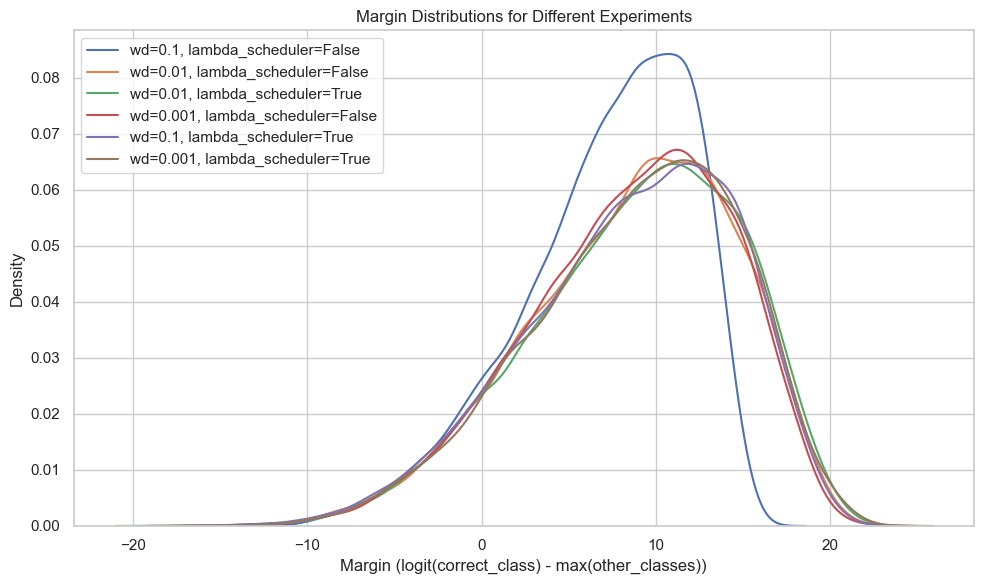

In [18]:
import os
import glob
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Set the directory containing result pickle files
results_dir = "./results"

# Find all pickle files in the directory
pkl_files = glob.glob(os.path.join(results_dir, "*.pkl"))

# Regex pattern to extract parameters from filename
# Example filenames:
# "vit_small_lr0.0001_wd0.001_lambda_scheduler_True"
# "vit_small_lr0.0001_wd0.001_no_scheduler"
pattern = re.compile(
    r'(vit_small)_lr([\d.e-]+)_wd([\d.e-]+)_(lambda_scheduler_True|no_scheduler)'
)

experiments_data = []

for pkl_file in pkl_files:
    # Extract info from filename
    base_name = os.path.splitext(os.path.basename(pkl_file))[0]
    match = pattern.search(base_name)
    if match:
        model, lr, wd, scheduler_str = match.groups()
        use_lambda_scheduler = True if "True" in scheduler_str else False
        
        # Load the pickle file
        with open(pkl_file, "rb") as f:
            data = pickle.load(f)
        
        # Extract margins from the data
        margins = data.get("final_margins", [])
        
        # Store the information in a list for plotting
        # We'll label the experiment using wd and scheduler status
        label = f"wd={wd}, lambda_scheduler={use_lambda_scheduler}"
        experiments_data.append((margins, label))

# Now we have a list of (margins, label) for each experiment.

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
for margins, label in experiments_data:
    sns.kdeplot(margins, shade=False, label=label)

plt.title("Margin Distributions for Different Experiments")
plt.xlabel("Margin (logit(correct_class) - max(other_classes))")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
import os
import glob
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Set the directory containing result pickle files
results_dir = "./results"

# Find all pickle files in the directory
pkl_files = glob.glob(os.path.join(results_dir, "*.pkl"))

for pkl in pkl_files:
    with open(pkl, "rb") as f:
        data = pickle.load(f)
    print(pkl)
    print(data["final_val_accuracies"][-1])
    

./results/vit_small_lr0.0001_wd0.1_no_scheduler.pkl
90.45
./results/vit_small_lr0.0001_wd0.01_no_scheduler.pkl
90.78
./results/vit_small_lr0.0001_wd0.01_lambda_scheduler_True.pkl
90.87
./results/vit_small_lr0.0001_wd0.001_no_scheduler.pkl
90.99
./results/vit_small_lr0.0001_wd0.1_lambda_scheduler_True.pkl
90.31
./results/vit_small_lr0.0001_wd0.001_lambda_scheduler_True.pkl
91.21
